##  CHSH Ungleichung

Simulation der Verletzung der CHSH-Ungleichung

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, execute, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

backend = Aer.get_backend('qasm_simulator')

In [2]:
def make_circuit(theta0, theta1):
    qc = QuantumCircuit(2,2)

    qc.h(0)
    qc.cx(0, 1)
    
    qc.barrier() 

    if theta0 != 0 :
        qc.ry(2*theta0, 0)

    if theta1 != 0 :
        qc.ry(2*theta1, 1)


    qc.barrier()    
    qc.measure(range(2),range(2))
    
    return qc

In [3]:
theta = -np.pi/8

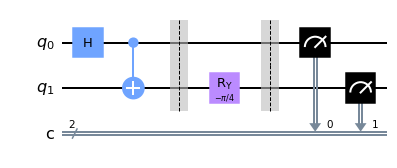

In [4]:
qc1 = make_circuit(0, theta )
qc1.draw('mpl')

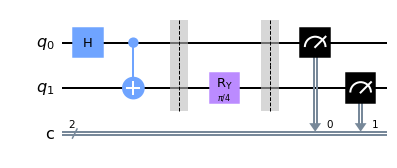

In [5]:
qc2 = make_circuit(0, -theta )
qc2.draw('mpl')

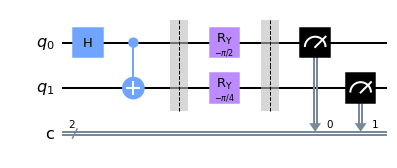

In [6]:
qc3 = make_circuit(2*theta, theta )
qc3.draw('mpl')

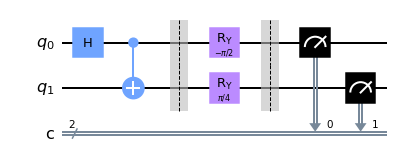

In [7]:
qc4 = make_circuit(2*theta, -theta )
qc4.draw('mpl')

#### Number of shots used by the simulation and by the run on a quantum computer

In [8]:
# global variable
shots=5000

In [9]:
def Cor(counts, shots):
    result = 0;
    
    if '00' in counts:
        result += counts['00']
    if '01' in counts:
        result -= counts['01']
    if '10' in counts:
        result -= counts['10']
    if '11' in counts:
        result += counts['11']

    return result/shots

{'11': 2139, '00': 2120, '10': 373, '01': 368}

E1 = +0.70360


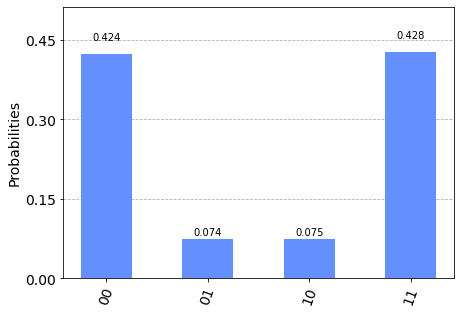

In [10]:
job1 = execute(qc1, backend, shots=shots)
result1 = job1.result()
counts1 = result1.get_counts(qc1)
E1 = Cor(counts1, shots)
print(counts1)
print()
print("E1 = {:+.5f}".format(E1));
plot_histogram(counts1)

{'11': 2120, '00': 2166, '10': 364, '01': 350}

E2 = +0.71440


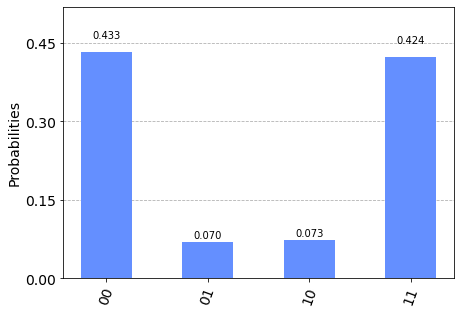

In [11]:
job2 = execute(qc2, backend, shots=shots)
result2 = job2.result()
counts2 = result2.get_counts(qc2)
E2 = Cor(counts2, shots)
print(counts2)
print()
print("E2 = {:+.5f}".format(E2));
plot_histogram(counts2)

{'11': 2088, '00': 2153, '10': 354, '01': 405}

E3 = +0.69640


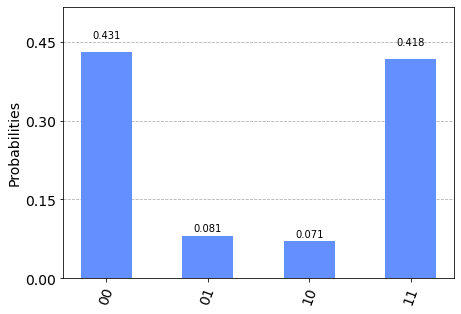

In [12]:
job3 = execute(qc3, backend, shots=shots)
result3 = job3.result()
counts3 = result3.get_counts(qc3)
E3 = Cor(counts3, shots)
print(counts3)
print()
print("E3 = {:+.5f}".format(E3));
plot_histogram(counts3)

{'01': 2148, '10': 2110, '00': 343, '11': 399}

E4 = -0.70320


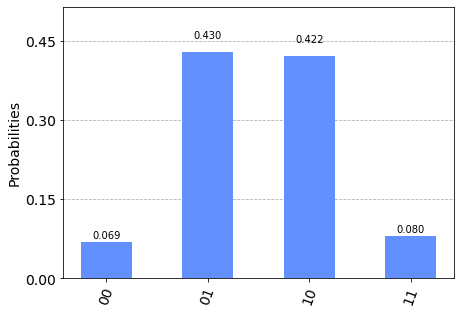

In [13]:
job4 = execute(qc4, backend, shots=shots)
result4 = job4.result()
counts4 = result4.get_counts(qc4)
E4 = Cor(counts4, shots)
print(counts4)
print()
print("E4 = {:+.5f}".format(E4));
plot_histogram(counts4)

In [14]:
print("E1: {:>3f}".format(E1))
print("E2: {:>3f}".format(E2))
print("E3: {:>3f}".format(E3))
print("E4: {:>3f}".format(E4))
E = E1 + E2 + E3 - E4
print("Korrelation {:>3f}".format(E) )
print("Theoretischer Wert {:>3f}".format(2*np.sqrt(2)) )

E1: 0.703600
E2: 0.714400
E3: 0.696400
E4: -0.703200
Correlation 2.817600
Theoretical Value 2.828427
